**Instituto Tecnológico y de Estudios Superiores de Monterrey**



**Modulo 5:** Data Analysis with Python

**Curso:** Ciencia y Analítica de Datos

David Winterman 

A00919441

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("pima-indians-diabetes.csv", header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Se definen las variables dependiente e independientes**

In [3]:
Y=df[0]
Y

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: 0, Length: 768, dtype: int64

In [4]:
X=df.drop(0, axis=1)

**El primer paso es dividir los datos en datos de entrenamientos y en datos de prueba**

In [5]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, train_size=0.80, random_state=1)

print("number of test samples :", Xtest.shape[0])
print("number of training samples:",Xtrain.shape[0])

number of test samples : 154
number of training samples: 614


**Question #1):**

Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [6]:
x_train1 , x_test1, y_train1, y_test1 =train_test_split(X,Y, test_size=0.40, random_state=0)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 308
number of training samples: 460


In [7]:
lre=LinearRegression()

In [8]:
lre.fit(Xtrain[[1]], Ytrain)

LinearRegression()

**Calculamos la R2**

In [9]:
lre.score(Xtest[[1]], Ytest)

0.012141741682931029

In [10]:
lre.score(Xtrain[[1]], Ytrain)

0.01759852610496271

**Question #2):**

Find the R^2 on the test data using 40% of the dataset for testing.

In [11]:
x_train1 , x_test1, y_train1, y_test1 =train_test_split(X,Y, test_size=0.40, random_state=0)

lre.fit(x_train1[[1]], y_train1)

lre.score(x_train1[[1]], y_train1)

0.016097627916581647

**El siguiente paso es realizar una validación cruzada**

In [12]:
Rcross = cross_val_score(lre, X[[1]], Y, cv=4)

In [13]:
Rcross

array([ 0.02120295,  0.01882484, -0.03295513, -0.00040469])

In [14]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.001666990969738824 and the standard deviation is 0.02167388236859657


**Question #3):**

Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "1" feature:

In [15]:
Rcross=cross_val_score(lre, X[[1]],Y, cv=2)
Rcross.mean()

-0.001934467935621964

In [16]:
yhat = cross_val_predict(lre,X[[1]], Y,cv=4)
yhat[0:5]

array([3.99773476, 3.38618109, 4.3374868 , 3.4250099 , 3.89095555])

**Sobreentrenamiento y Subentrenamiento**

In [17]:
#para este caso pondremos como ejemplo una regresión lineal multiple

lr = LinearRegression()
lr.fit(Xtrain[[1,2,3,4]], Ytrain)

LinearRegression()

In [18]:
#predicción con datos de entrenamiento
yhat_train = lr.predict(Xtrain[[1,2,3,4]])
yhat_train[0:5]

array([3.89821538, 3.66236524, 3.24414614, 4.65750011, 3.63700455])

In [19]:
#predicción con datos de prueba
yhat_test = lr.predict(Xtest[[1,2,3,4]])
yhat_test[0:5]

array([3.98439903, 4.66555073, 3.47598998, 3.28870431, 3.61811418])

**Sobre entrenamiento**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=0)

In [21]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[[1]])
x_test_pr = pr.fit_transform(x_test[[1]])
pr

PolynomialFeatures(degree=5)

In [22]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [23]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([3.75830421, 3.63394618, 2.87739307, 4.31144355, 3.7490658 ])

In [24]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [3.75830421 3.63394618 2.87739307 4.31144355]
True values: [1 2 4 5]


In [25]:
poly.score(x_train_pr, y_train)

0.01928852259327052

In [26]:
poly.score(x_test_pr, y_test)

0.01319844960696337

Text(3, 0.75, 'Maximum R^2 ')

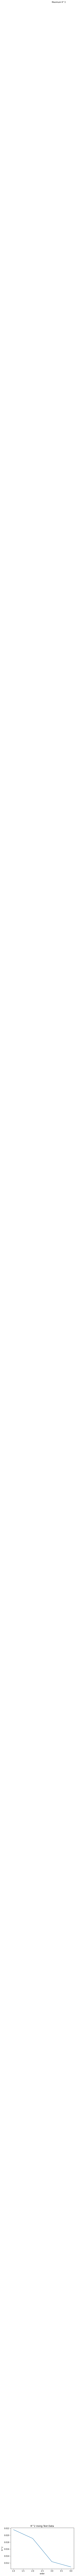

In [27]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[[1]])
    
    x_test_pr = pr.fit_transform(x_test[[1]])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [28]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[[1]])
    x_test_pr = pr.fit_transform(x_test[[1]])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[[1]], x_test[[1]], y_train,y_test, poly, pr)

**Question #4a):**

We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

In [29]:
pr1=PolynomialFeatures(degree=2)

**Question #4b):** 

Transform the training and testing samples for the features 1,2,3,4. Hint: use the method "fit_transform".

In [30]:
x_train_pr1=pr1.fit_transform(x_train[[1]])

x_test_pr1=pr1.fit_transform(x_test[[1]])


**Question #4c):**

How many dimensions does the new feature have? Hint: use the attribute "shape".

In [31]:
print(x_train_pr1.shape)


print(x_test_pr1.shape)



(422, 3)
(346, 3)


**Question #4d):**

Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features

In [32]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

**Question #4e):**¶

Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

In [33]:
yhat_test1=poly1.predict(x_test_pr1)

**PARTE 3: Ridge Regression**

In [34]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[[1,2,3,4,5,6]])
x_test_pr=pr.fit_transform(x_test[[1,2,3,4,5,6]])

In [35]:
#este modelo sirve para regular el sobre entrenamiento de un modelo

RigeModel=Ridge(alpha=1)

In [36]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [37]:
yhat = RigeModel.predict(x_test_pr)

In [38]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [4.24901762 3.14536305 4.57513444 4.26311124]
test set : [1 2 4 5]


In [39]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:21<00:00, 46.37it/s, Test Score=-.26, Train Score=0.117]


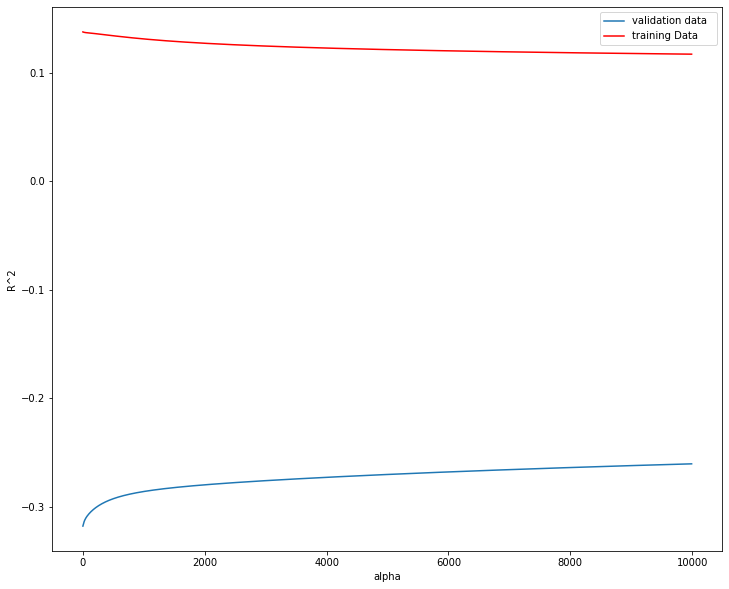

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Question #5):** 

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

In [41]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

-0.31573953719001935

**PARTE 4: GridSearch**

In [42]:
#esta función sirve para encontrar los mejores hiperparámetros del modelo a correr

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [43]:
RR=Ridge()
RR

Ridge()

In [44]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [45]:
Grid1.fit(X[[1,2,3,4]], Y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [46]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [47]:
BestRR.score(x_test[[1,2,3,4]], y_test)

0.04961903784509303